- PCA is fundamentally a dimensionality reduction algorithm
- But it can also be useful as a tool for visualization, for noise filtering, for feature extraction and engineering, and much more.
- Unsupervised method - simply looks as data standardize it, find covar matrix and perfrom pca.- no need of labeled data/target variables.

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set_theme()


In [6]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2,2), rng.randn(2,200)).T


In [8]:
X.shape

(200, 2)

Text(0.5, 1.0, 'Data for PCA analysis')

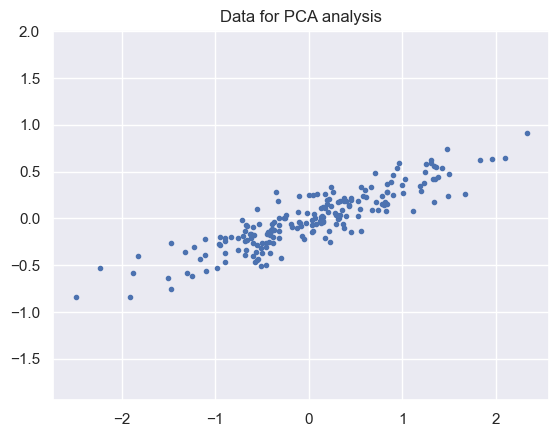

In [14]:
plt.scatter(X[:,0], X[:,1], marker = '.')
plt.axis('equal')
plt.title('Data for PCA analysis')

- By eye, it is clear that there is a nearly linear relationship between the x and y variables.
- But here we will try to find the relationship between x and y, using unsupervised learning PCA.


In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

In [20]:
pca.components_  # Vector direction

array([[ 0.94446029,  0.32862557],
       [-0.32862557,  0.94446029]])

In [19]:
pca.explained_variance_   # squared length of vector

array([0.7625315, 0.0184779])

In [26]:
pca.mean_

array([ 0.03351168, -0.00408072])

In [33]:
# Drawing vector between points p1 and p2
# ax is axis on which we want to draw the vector
# Do this using ax.annotate


def draw_vector(p1, p2, ax=None):
    ax = ax or plt.gca()   # if axis not given plot on same plot axis

    arrowproperties = dict(arrowstyle = '->',   # Define arrowprops
                           linewidth = 2,
                           shrinkA = 0,
                           shrinkB = 0,
                           color = 'black'
                           )
    ax.annotate('', p2, p1, arrowprops=arrowproperties)  


(np.float64(-2.7292712056271964),
 np.float64(2.5702744393352615),
 np.float64(-0.9326181575178751),
 np.float64(1.004413830229183))

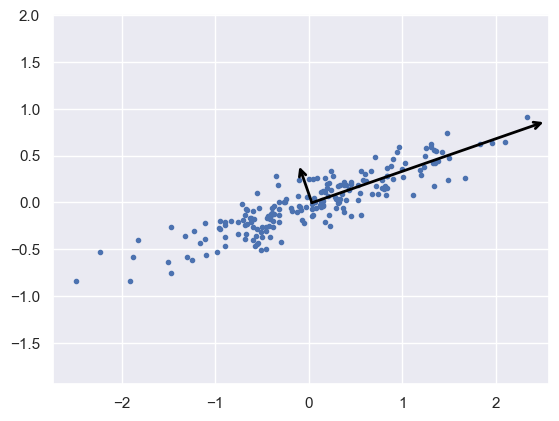

In [39]:
plt.scatter(X[:,0], X[:, 1], marker='.')
for length, vector in zip(pca.explained_variance_,pca.components_):
    v = vector*3* np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)

plt.axis('equal')

- These vectors represent the principal axes of the data, 
- length shown is an indication of how “important” that axis is in describing the distribution of the data—more precisely 
- it is a measure of the variance of the data when projected onto that axis. 
- **The projection of each data point onto the principal axes are the “principal components” of the data.**

In [56]:
X_pca = pca.fit_transform(X)

In [57]:
X_pca

array([[-6.76769235e-01,  5.97386015e-02],
       [ 1.07121393e+00,  2.57240064e-01],
       [-7.27912364e-01, -1.68669939e-01],
       [-2.30964136e+00,  2.44066575e-01],
       [-6.30052323e-01, -3.04655713e-01],
       [-1.02448887e+00,  7.56230140e-02],
       [-7.77183507e-01, -8.34608477e-02],
       [ 1.39656414e+00,  1.44518385e-01],
       [ 2.91049874e-01, -2.01289478e-01],
       [-1.88864221e+00,  2.31419563e-01],
       [ 7.11544293e-01,  1.13426118e-01],
       [-6.38884130e-01,  3.88212853e-02],
       [-5.48059617e-01, -2.00775267e-01],
       [ 2.19312436e-01,  2.08243673e-01],
       [ 3.87789490e-01,  6.89135848e-02],
       [-7.15219956e-01,  1.13841003e-01],
       [ 1.08373816e+00,  7.78081042e-02],
       [ 2.99917403e-01, -5.86382919e-02],
       [ 7.96849021e-01,  2.44527383e-01],
       [ 8.12568346e-01, -1.17341246e-01],
       [ 1.54018281e+00, -3.24862050e-02],
       [ 2.52920476e-01, -4.86012463e-02],
       [-6.26464454e-01, -1.68045678e-01],
       [ 1.

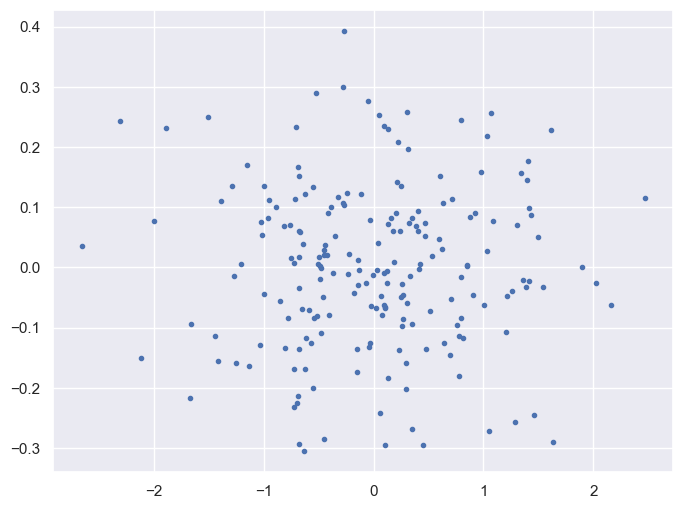

In [61]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], marker= '.')

# PCA as a dimensionality reduction

- Zeroing out one or more of the smallest principal components.
- resulting in a lower-dimensional projection of the data that preserves the maximal data variance.



In [62]:
pca = PCA(n_components=1)
pca.fit(X)

PCA(n_components=1)

In [63]:
X_pca = pca.transform(X)

In [64]:
print("original shape: ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:  (200, 2)
transformed shape: (200, 1)


Text(0.5, 1.0, 'Visualization of PCA as dimensionality reduction')

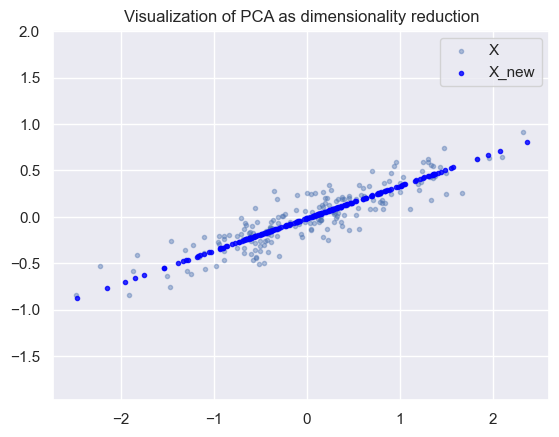

In [78]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.4, marker = '.', label= 'X')    
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8, color = 'blue', marker='.', label= 'X_new')
plt.axis('equal')
plt.legend()
plt.title('Visualization of PCA as dimensionality reduction')

- The fraction of variance that is cut out (proportional
to the spread of points about the line formed in Figure 5-83) is roughly a measure
of how much “information” is discarded in this reduction of dimensionality.

- This reduced-dimension dataset is in some senses “good enough” to encode the most
important relationships between the points: despite reducing the dimension of the
data by 50%, the overall relationship between the data points is mostly preserved.

# Choosing the number of components

- plot **Cumulative explained variance ratio**

``` python
plt.plot(np.cumsum(pca.explained_variance_ratio_))
```